<a href="https://colab.research.google.com/github/Elbx88/ML-Model-Perdiction/blob/main/Project_ML_Models_Erez_Levy_TMDB_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ML Model Perdiction-Part IV Feature Eng. & Feature Selection

# The TMDB Dataset

The TMDB (The Movie Database) is a widely-used resource for movie and TV show data, providing valuable information such as ratings, plot summaries, and more.

This dataset contains a collection of 150,000 tv shows from the TMDB database, collected and cleaned.

# The Project Overview:


This dataset opens up a wide range of possibilities for data analysts and data scientists. Here are some ideas to get you started:

Explore trends in TV show popularity based on vote count and average.
Analyze TV show genres to identify the most popular genres or combinations of genres.
Investigate the relationship between TV show ratings and the number of seasons and episodes.
Build a recommendation system that suggests TV shows based on a user's favorite genres or languages.
Predict the success of a TV show based on features like vote count, average, and popularity.
Identify the most prolific TV show creators or production companies based on the number of shows they have created.
Explore the distribution of TV show run times and investigate whether episode duration affects the overall ratings.
Investigate TV show production trends across different countries and networks.
Analyze the relationship between TV show language and popularity, and investigate the popularity of non-English shows.
Track the status of TV shows (in production or not) and analyze their popularity over time.
Develop a language analysis model to identify sentiment or themes from TV show overviews.

I need to build a predictive model to determine the success of a TV show based on features like vote count, vote average, and popularity. We'll approach this as a regression problem, where we predict a continuous success metric, and we'll use multiple regression models.



**Approach**
Feature Selection: Choose the features you want to use for prediction (vote_count, vote_average, popularity, and potentially others like number_of_episodes, number_of_seasons).

Target Variable: Define the target variable. In this case, we'll use popularity as a measure of success.

Data Splitting: Split the data into training and testing sets.

Model Selection: Try several regression models:
Linear Regression: A good starting point for regression problems.
Random Forest Regressor: A more complex model that can capture non-linear relationships.
Gradient Boosting Regressor: Another advanced model known for good performance.

Model Training: Train the models on the training set.

Model Evaluation: Evaluate the models on the testing set using appropriate metrics (e.g., R-squared, Mean Absolute Error (MAE), Root Mean Squared Error (RMSE)).

Cross-Validation: Use Cross-Validation to ensure that the model does not overfit.

Hyperparameter Tuning: Use Hyperparameter Tuning to optimize the model parameters.

# Target Value prediction
Based on the potential insights and business value, I would suggest focusing on predicting either:

Popularity: It is a complex and dynamic metric that reflects overall success.
Vote Average (Rating): It captures audience satisfaction and critical acclaim.
Both of these targets have valuable real-world implications and can be approached with a variety of machine learning models.

Important Considerations:

Feature Engineering: Carefully select and engineer features from the TMDB data that you think will be most relevant to your chosen target variable.
Model Selection: Experiment with different machine learning models (regression for popularity or ratings, classification for status/renewal) to find the best performer.
Evaluation: Use appropriate metrics (like RMSE for regression or accuracy for classification) to assess the performance of your predictive model.

# Importing Pickel file tmdb_clean

In [1]:
import pickle
from google.colab import drive

# Mount Google Drive (if you haven't already)
drive.mount('/content/drive')

# Define the file path where the pickle file is located in your Google Drive
file_path = '/content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_clean.pkl'  # Replace 'your_folder' with the actual folder name

# Load the data from the pickle file
try:
    with open(file_path, 'rb') as file:
        tmdb_clean = pickle.load(file)
    print(f"tmdb_clean loaded from {file_path} successfully.")

    # You can now use the loaded DataFrame (tmdb_filtered
    # For example, you can display the first few rows:
    print(tmdb_clean.head())
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the file path and ensure the file exists in your Google Drive.")
except Exception as e:
    print(f"An error occurred: {e}")

Mounted at /content/drive
tmdb_clean loaded from /content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_clean.pkl successfully.
              name        id  number_of_seasons  number_of_episodes  \
0          minutes   39280.0                  0                   0   
1              man  222838.6                  1                   5   
2   erne tur retur  222838.6                  1                  10   
3                    34835.0                  1                  12   
4             bama   42598.0                  0                   0   

   vote_count  vote_average first_air_date last_air_date  popularity  \
0           0           0.0            NaT           NaT    0.470004   
1           3           7.7     2023-05-28    2023-06-25    1.723837   
2           0           0.0     2014-05-15    2014-07-17    0.470004   
3          10           6.4     2006-10-06    2006-12-22    2.375928   
4           0           0.0            NaT           NaT    0.470004   

    

# The tmdb_clean Analysis

In [2]:
tmdb_clean.head(10)

,name,id,number_of_seasons,number_of_episodes,vote_count,vote_average,first_air_date,last_air_date,popularity,type,genres,created_by,languages,networks,origin_country,production_companies,episode_run_time,adult_True,air_time
0,minutes,39280.00,0,0,0,0.0,NaT,NaT,0.470004,Scripted,Drama,Shotaro Ishinomori,en,other,US,other,30,0,49.0
1,man,222838.60,1,5,3,7.7,2023-05-28,2023-06-25,1.723837,Scripted,Drama,Shuichi Okita,ja,WOWOW Prime,JP,other,50,0,28.0
2,erne tur retur,222838.60,1,10,0,0.0,2014-05-15,2014-07-17,0.470004,Scripted,Drama,Shotaro Ishinomori,en,other,DK,other,0,0,63.0
3,,34835.00,1,12,10,6.4,2006-10-06,2006-12-22,2.375928,Scripted,other,Shotaro Ishinomori,ja,other,JP,other,30,0,77.0
4,bama,42598.00,0,0,0,0.0,NaT,NaT,0.470004,Scripted,Comedy,Shotaro Ishinomori,en,other,US,other,0,0,49.0
5,,5623.55,0,0,0,0.0,NaT,NaT,0.470004,Scripted,Drama,Shotaro Ishinomori,en,CBC Television,CA,other,0,0,49.0
6,,53608.00,0,0,0,0.0,NaT,NaT,0.470004,Scripted,Drama,Shotaro Ishinomori,ar,other,EG,other,0,0,49.0
7,,222838.60,1,3,0,0.0,2021-08-30,2021-09-01,0.622725,Documentary,Documentary,Shotaro Ishinomori,en,other,US,other,0,0,2.0
8,nt,57291.00,0,0,0,0.0,NaT,NaT,0.470004,Scripted,Drama,Shotaro Ishinomori,en,other,US,other,0,0,49.0
9,s_wr,60387.00,0,1,0,0.0,NaT,2013-10-06,0.470004,Scripted,Drama,Shotaro Ishinomori,en,other,US,other,0,0,49.0


# Dataset tmdb.clean Describe

In [3]:
tmdb_clean.describe().T

,count,mean,min,25%,50%,75%,max,std
id,78501.0,80183.4633,5623.55,29936.0,60254.0,112207.0,222838.6,64247.889147
number_of_seasons,78501.0,0.900957,0.0,1.0,1.0,1.0,3.0,0.669204
number_of_episodes,78501.0,13.593254,0.0,1.0,6.0,16.0,92.0,20.306675
vote_count,78501.0,2.632629,0.0,0.0,0.0,1.0,29.0,6.553333
vote_average,78501.0,2.641944,0.0,0.0,0.0,6.5,9.0,3.483537
first_air_date,58633,2006-10-18 05:57:13.117868800,1921-01-01 00:00:00,2000-10-14 00:00:00,2010-10-29 00:00:00,2017-12-28 00:00:00,2024-04-23 00:00:00,NaN
last_air_date,59105,2007-06-12 14:10:33.083495424,1921-07-09 00:00:00,2001-09-20 00:00:00,2011-05-20 00:00:00,2018-06-07 00:00:00,2024-04-04 00:00:00,NaN
popularity,78501.0,1.003305,0.470004,0.470004,0.644482,1.289783,3.102879,0.735652
episode_run_time,78501.0,24.716666,0.0,0.0,25.0,45.0,70.0,24.165623
adult_True,78501.0,0.016981,0.0,0.0,0.0,0.0,1.0,0.1292


In [4]:
tmdb_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78501 entries, 0 to 82871
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   name                  78501 non-null  object        
 1   id                    78501 non-null  float64       
 2   number_of_seasons     78501 non-null  int64         
 3   number_of_episodes    78501 non-null  int64         
 4   vote_count            78501 non-null  int64         
 5   vote_average          78501 non-null  float64       
 6   first_air_date        58633 non-null  datetime64[ns]
 7   last_air_date         59105 non-null  datetime64[ns]
 8   popularity            78501 non-null  float64       
 9   type                  78501 non-null  object        
 10  genres                78501 non-null  object        
 11  created_by            78501 non-null  object        
 12  languages             78501 non-null  object        
 13  networks             

In [5]:
tmdb_clean.agg('count')

,0
name,78501
id,78501
number_of_seasons,78501
number_of_episodes,78501
vote_count,78501
vote_average,78501
first_air_date,58633
last_air_date,59105
popularity,78501
type,78501


# Analizing  DataSet tmdb_clean

<ipython-input-6-2c966223017d>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tmdb_clean['log_popularity'], kde=True)  # kde=True shows the kernel density estimate


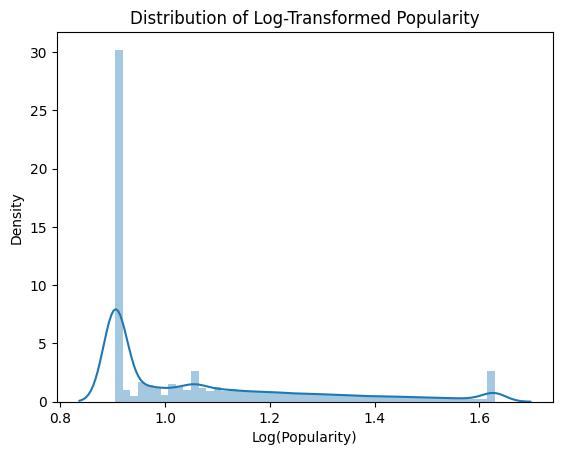

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Using  tmdb_clean as the  DataFrame

# Apply log transformation to 'popularity' and handle potential zeros or negative values
tmdb_clean['log_popularity'] = np.log1p(1+tmdb_clean['popularity'])  # log1p(x) = log(1 + x)

# Create the distplot
sns.distplot(tmdb_clean['log_popularity'], kde=True)  # kde=True shows the kernel density estimate
plt.title('Distribution of Log-Transformed Popularity')
plt.xlabel('Log(Popularity)')
plt.ylabel('Density')
plt.show()


# Feature Eng. & Selection
Enriching: Create new features from existing ones

In [7]:
tmdb_eng=tmdb_clean.copy()
tmdb_eng.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78501 entries, 0 to 82871
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   name                  78501 non-null  object        
 1   id                    78501 non-null  float64       
 2   number_of_seasons     78501 non-null  int64         
 3   number_of_episodes    78501 non-null  int64         
 4   vote_count            78501 non-null  int64         
 5   vote_average          78501 non-null  float64       
 6   first_air_date        58633 non-null  datetime64[ns]
 7   last_air_date         59105 non-null  datetime64[ns]
 8   popularity            78501 non-null  float64       
 9   type                  78501 non-null  object        
 10  genres                78501 non-null  object        
 11  created_by            78501 non-null  object        
 12  languages             78501 non-null  object        
 13  networks             

#Enriching:

Creating new features from existing ones to better capture the underlying patterns in the data. This can involve mathematical transformations, aggregations, or domain-specific knowledge.

In [8]:
import pandas as pd
import numpy as np

# Uing tmdb_eng as DataFrame

# 1. Average episode runtime per number_of_seasons:
tmdb_eng['avg_episode_runtime_per_number_of_seasons'] = tmdb_eng['episode_run_time'] / tmdb_eng['number_of_seasons']

# 2. Total runtime of the show:
tmdb_eng['total_runtime'] = tmdb_eng['episode_run_time'] * tmdb_eng['number_of_episodes']

# 3. Production company count:
# Convert to string before using str accessor
tmdb_eng['production_company_count'] = tmdb_eng['production_companies'].astype(str).str.split(',').str.len()

# 4. Network count:
# Convert to string before using str accessor
tmdb_eng['network_count'] = tmdb_eng['networks'].astype(str).str.split(',').str.len()

# 5. Genre count:
# Convert to string before using str accessor
tmdb_eng['genre_count'] = tmdb_eng['genres'].astype(str).str.split(',').str.len()

# 6. Origin country count (if multiple):
# Convert to string before using str accessor
tmdb_eng['origin_country_count'] = tmdb_eng['origin_country'].astype(str).str.split(',').str.len()

# 7. Created by count (if multiple):
# Convert to string before using str accessor
tmdb_eng['created_by_count'] = tmdb_eng['created_by'].astype(str).str.split(',').str.len()

# 8. Vote count to number of episodes ratio:
tmdb_eng['vote_count_to_episodes_ratio'] = tmdb_eng['vote_count'] / tmdb_eng['number_of_episodes']

# 9. Vote average weighted by vote count:
tmdb_eng['weighted_vote_average'] = tmdb_eng['vote_average'] * tmdb_eng['vote_count']

# 10. Popularity score (combination of existing metrics):
# You can experiment with different weights/coefficients
tmdb_eng['popularity_score'] = (
    0.5 * tmdb_eng['popularity'] +
    0.3 * tmdb_eng['vote_average'] +
    0.2 * tmdb_eng['vote_count']
)

# Display the updated DataFrame with new features
tmdb_eng.head()

,name,id,number_of_seasons,number_of_episodes,vote_count,vote_average,first_air_date,last_air_date,popularity,type,...,avg_episode_runtime_per_number_of_seasons,total_runtime,production_company_count,network_count,genre_count,origin_country_count,created_by_count,vote_count_to_episodes_ratio,weighted_vote_average,popularity_score
0,minutes,39280.0,0,0,0,0.0,NaT,NaT,0.470004,Scripted,...,inf,0,1,1,1,1,1,NaN,0.0,0.235002
1,man,222838.6,1,5,3,7.7,2023-05-28,2023-06-25,1.723837,Scripted,...,50.0,250,1,1,1,1,1,0.600000,23.1,3.771919
2,erne tur retur,222838.6,1,10,0,0.0,2014-05-15,2014-07-17,0.470004,Scripted,...,0.0,0,1,1,1,1,1,0.000000,0.0,0.235002
3,,34835.0,1,12,10,6.4,2006-10-06,2006-12-22,2.375928,Scripted,...,30.0,360,1,1,1,1,1,0.833333,64.0,5.107964
4,bama,42598.0,0,0,0,0.0,NaT,NaT,0.470004,Scripted,...,NaN,0,1,1,1,1,1,NaN,0.0,0.235002


# Normalization/Standardization:
Scale numerical features to ensure they have similar ranges,

In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Using tmdb_eng as  DataFrame

# Select numerical features for scaling
numerical_features = ['number_of_episodes', 'number_of_seasons', 'vote_count', 'vote_average', 'popularity',
                      'episode_run_time', 'avg_episode_runtime_per_number_of_seasons', 'total_runtime',
                      'production_company_count', 'network_count', 'genre_count', 'origin_country_count',
                      'created_by_count']

# Replace infinite values with NaN
tmdb_eng[numerical_features] = tmdb_eng[numerical_features].replace([np.inf, -np.inf], np.nan)

# Impute NaN values (if any) with the median of the column
# (You can also use other strategies like mean or a constant value)
for feature in numerical_features:
    tmdb_eng[feature] = tmdb_eng[feature].fillna(tmdb_eng[feature].median())

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the selected numerical features and transform them
tmdb_eng[numerical_features] = scaler.fit_transform(tmdb_eng[numerical_features])

# Display the updated DataFrame with scaled features
tmdb_eng.head()

,name,id,number_of_seasons,number_of_episodes,vote_count,vote_average,first_air_date,last_air_date,popularity,type,...,avg_episode_runtime_per_number_of_seasons,total_runtime,production_company_count,network_count,genre_count,origin_country_count,created_by_count,vote_count_to_episodes_ratio,weighted_vote_average,popularity_score
0,minutes,39280.0,-1.346320,-0.669403,-0.401726,-0.758413,NaT,NaT,-0.724942,Scripted,...,-0.068351,-0.503073,0.0,-0.036247,-0.444372,-0.114937,-0.228075,NaN,0.0,0.235002
1,man,222838.6,0.148003,-0.423177,0.056059,1.451998,2023-05-28,2023-06-25,0.979452,Scripted,...,1.212566,-0.173808,0.0,-0.036247,-0.444372,-0.114937,-0.228075,0.600000,23.1,3.771919
2,erne tur retur,222838.6,0.148003,-0.176951,-0.401726,-0.758413,2014-05-15,2014-07-17,-0.724942,Scripted,...,-1.250737,-0.503073,0.0,-0.036247,-0.444372,-0.114937,-0.228075,0.000000,0.0,0.235002
3,,34835.0,0.148003,-0.078460,1.124225,1.078811,2006-10-06,2006-12-22,1.865870,Scripted,...,0.227245,-0.028931,0.0,-0.036247,-0.444372,-0.114937,-0.228075,0.833333,64.0,5.107964
4,bama,42598.0,-1.346320,-0.669403,-0.401726,-0.758413,NaT,NaT,-0.724942,Scripted,...,-0.068351,-0.503073,0.0,-0.036247,-0.444372,-0.114937,-0.228075,NaN,0.0,0.235002


In [10]:
tmdb_eng.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78501 entries, 0 to 82871
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   name                                       78501 non-null  object        
 1   id                                         78501 non-null  float64       
 2   number_of_seasons                          78501 non-null  float64       
 3   number_of_episodes                         78501 non-null  float64       
 4   vote_count                                 78501 non-null  float64       
 5   vote_average                               78501 non-null  float64       
 6   first_air_date                             58633 non-null  datetime64[ns]
 7   last_air_date                              59105 non-null  datetime64[ns]
 8   popularity                                 78501 non-null  float64       
 9   type                  

# Categorial Data Analysis

<class 'pandas.core.frame.DataFrame'>
Index: 78501 entries, 0 to 82871
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   production_companies  78501 non-null  object
 1   networks              78501 non-null  object
 2   languages             78501 non-null  object
 3   genres                78501 non-null  object
 4   origin_country        78501 non-null  object
 5   created_by            78501 non-null  object
 6   type                  78501 non-null  object
dtypes: object(7)
memory usage: 4.8+ MB


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26449 (\N{CJK UNIFIED IDEOGRAPH-6751}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20856 (\N{CJK UNIFIED IDEOGRAPH-5178}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26408 (\N{CJK UNIFIED IDEOGRAPH-6728}) missing from font(s) DejaVu Sans.
  fig.canvas

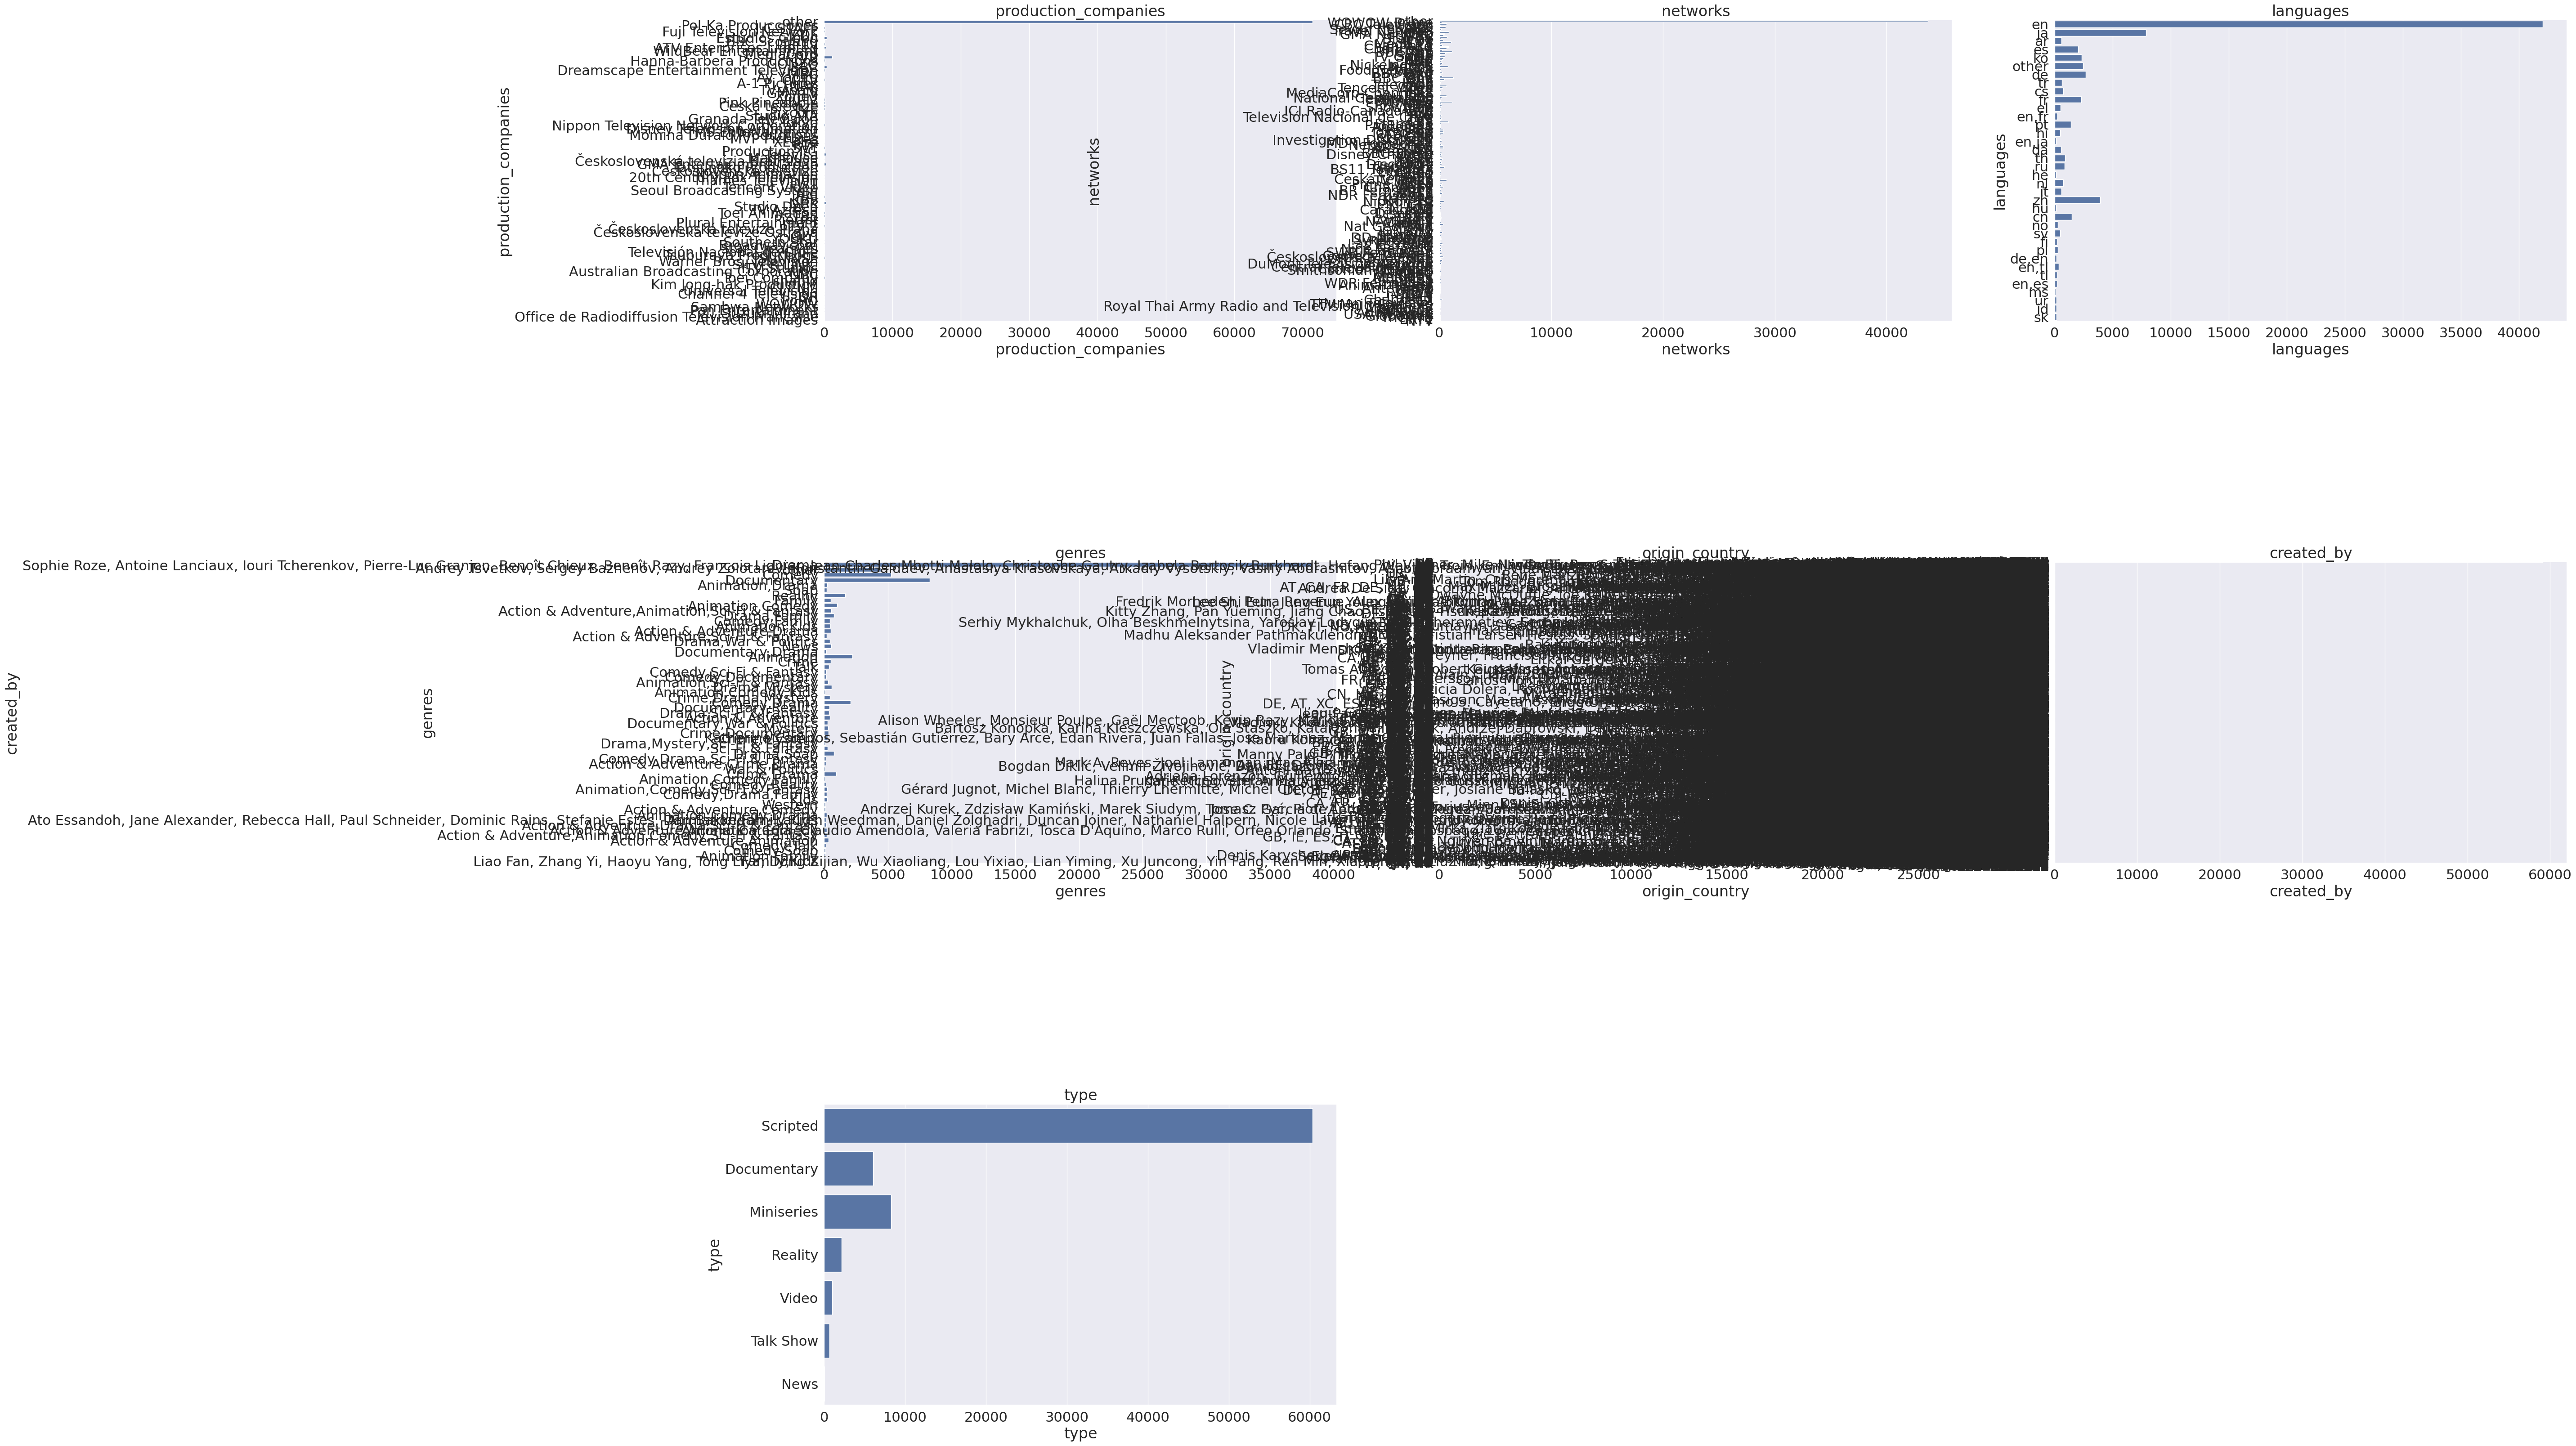

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns you want to analyze
cat_list = ['production_companies', 'networks', 'languages', 'genres', 'origin_country', 'created_by', 'type']

# Check if all columns in cat_list are present in tmdb_model
missing_cols = [col for col in cat_list if col not in tmdb_eng.columns]

# If any columns are missing, print a message and exit
if missing_cols:
    print(f"Error: The following columns are missing in tmdb_model: {missing_cols}")
    print("Please check the column names in 'cat_list' and your DataFrame.")
else:
    # Proceed with your code if all columns are present
    tmdb_cat = tmdb_eng[cat_list]
    tmdb_cat.info()

    a = 3  # number of rows
    b = 3  # number of columns
    c = 1  # plot counter

    fig = plt.figure(figsize=(50, 40))
    plt.subplots_adjust(hspace=0.8)
    sns.set(font_scale=2)
    for i in tmdb_cat:
        plt.subplot(a, b, c)
        plt.title('{}'.format(i))
        plt.xlabel(i)
        sns.countplot(tmdb_cat[i])
        c = c + 1

    plt.show()

# Numeric (Continue) Analysis

In [14]:
#get all numeric data
#cols=df.columns
tmdb_num=tmdb_eng._get_numeric_data().dropna()
tmdb_num.shape

(60393, 20)

In [15]:
tmdb_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60393 entries, 1 to 82871
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   id                                         60393 non-null  float64
 1   number_of_seasons                          60393 non-null  float64
 2   number_of_episodes                         60393 non-null  float64
 3   vote_count                                 60393 non-null  float64
 4   vote_average                               60393 non-null  float64
 5   popularity                                 60393 non-null  float64
 6   episode_run_time                           60393 non-null  float64
 7   adult_True                                 60393 non-null  int64  
 8   air_time                                   60393 non-null  float64
 9   log_popularity                             60393 non-null  float64
 10  avg_episode_runtime_per_num

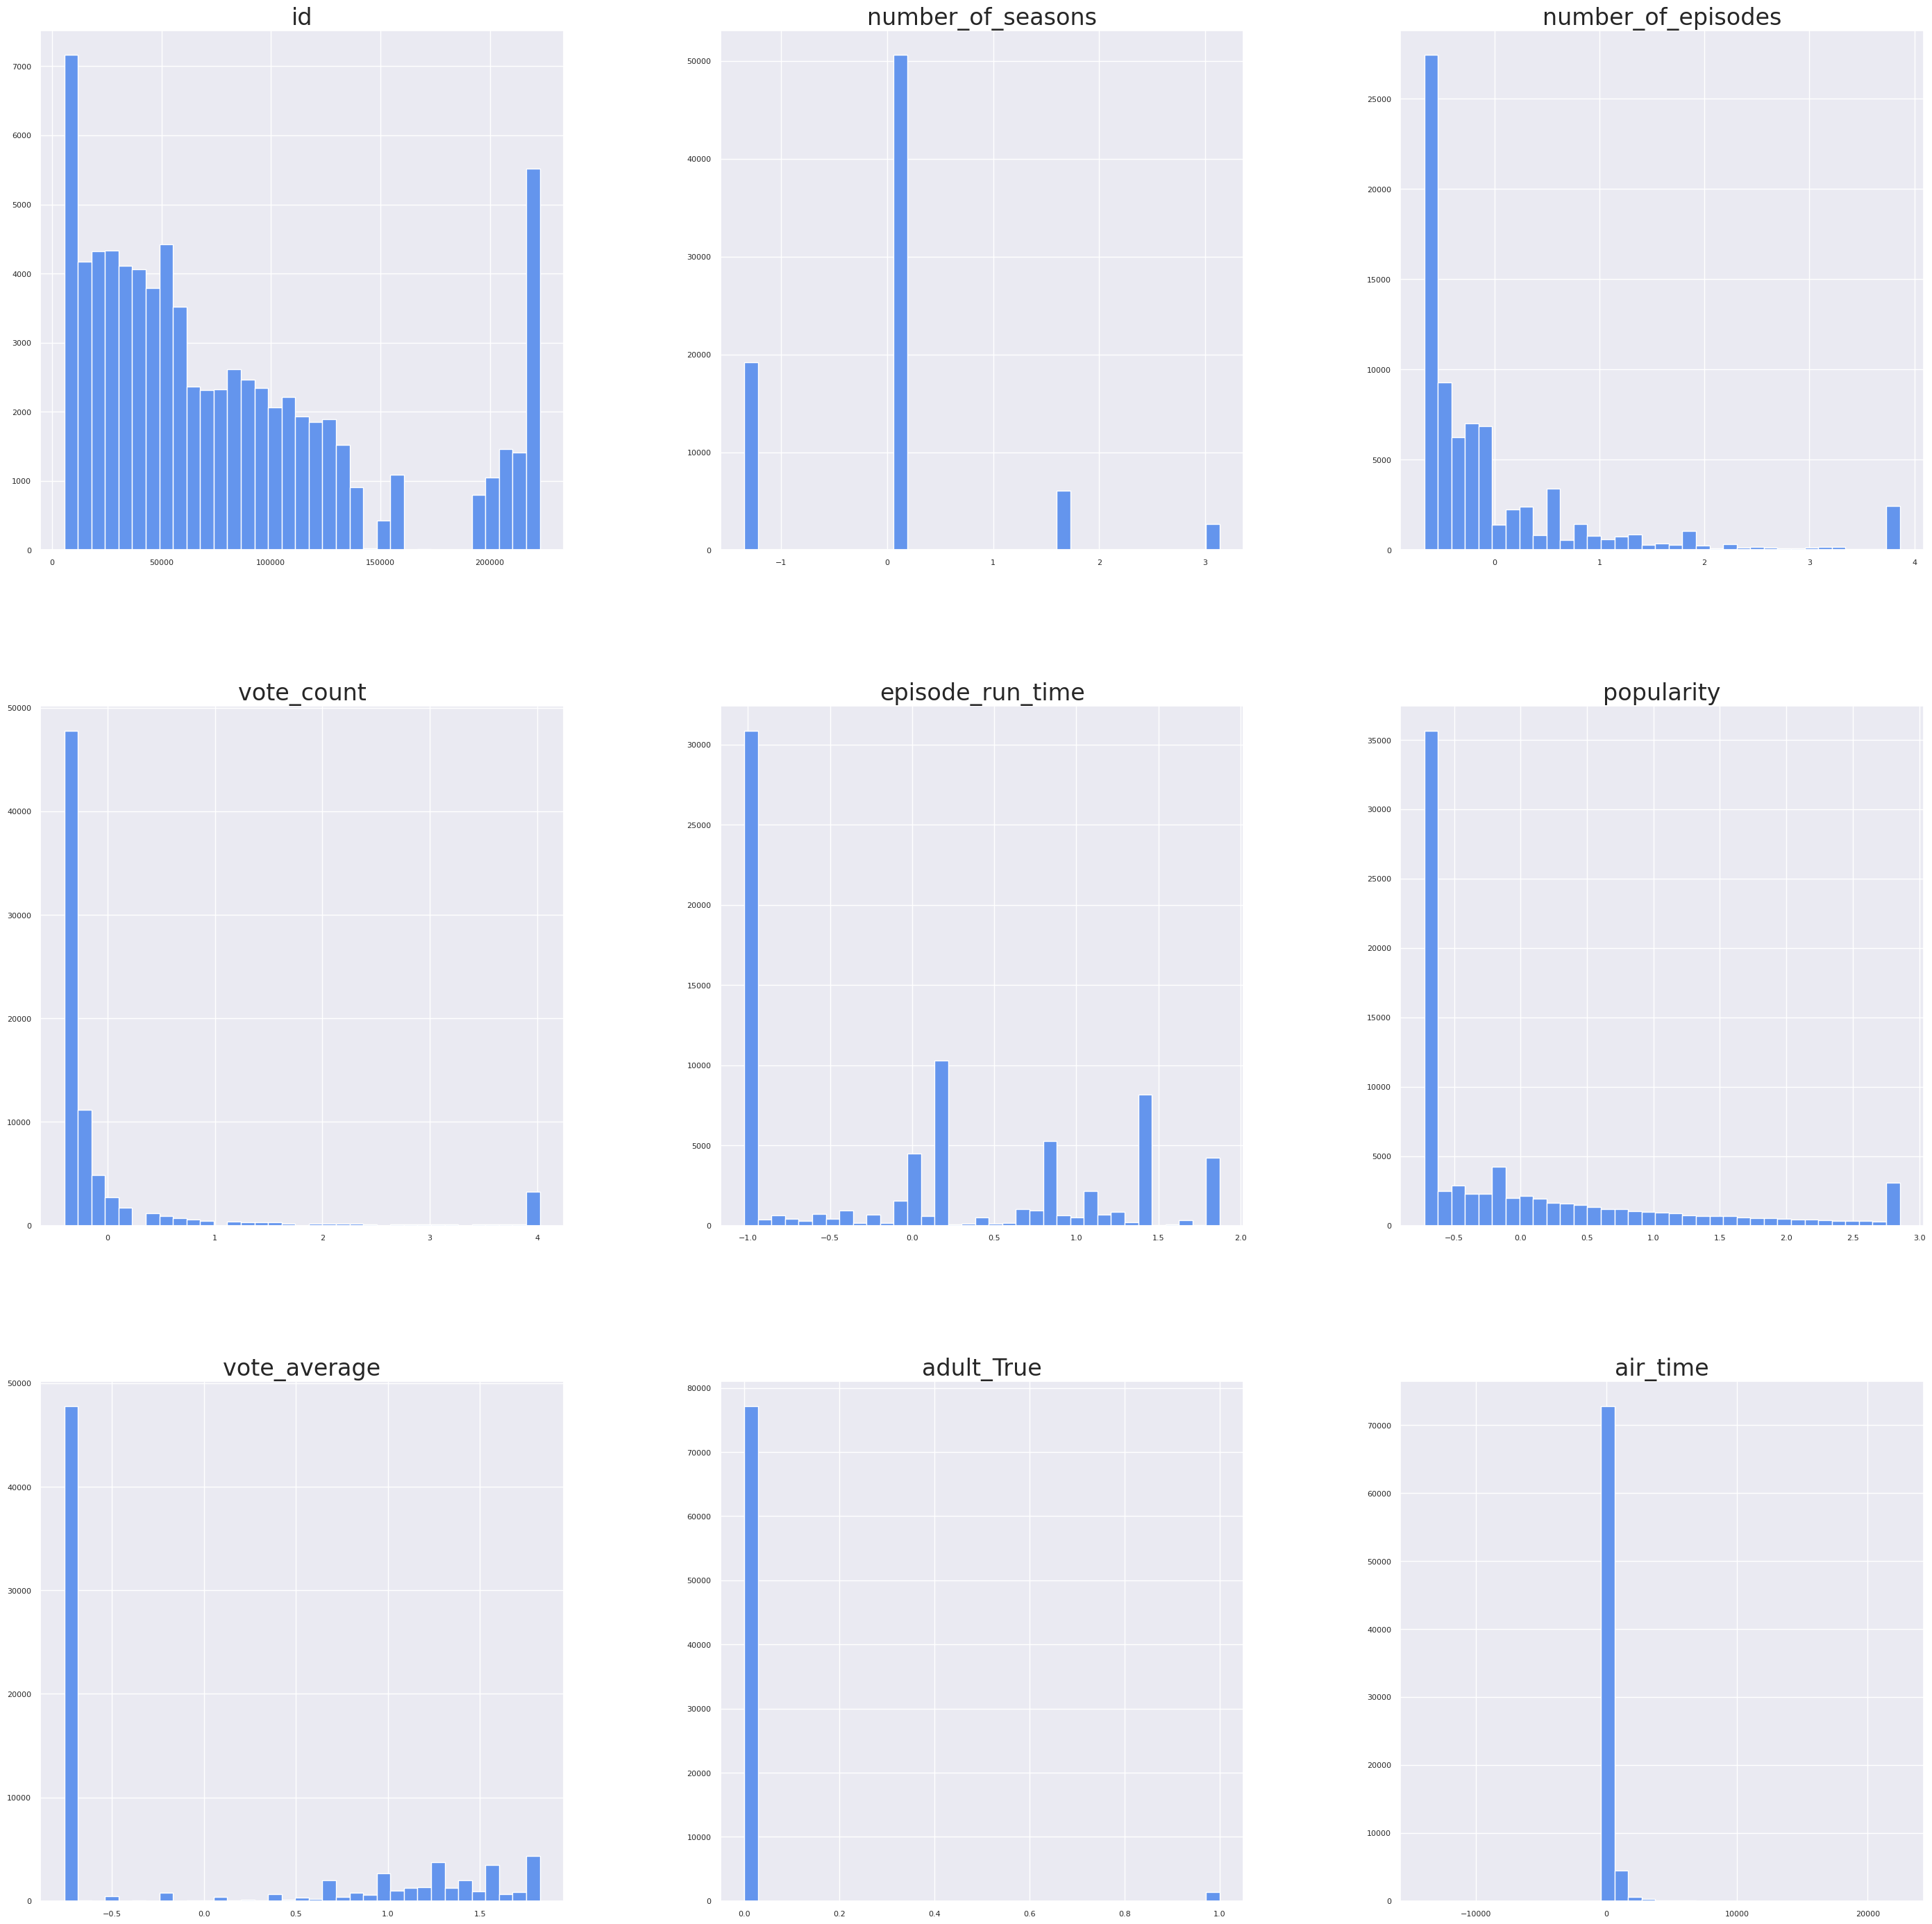

In [17]:
# Convert specified columns to float
columns_to_convert = ['id','number_of_seasons', 'number_of_episodes', 'vote_count', 'episode_run_time','popularity','vote_average','adult_True','air_time']
tmdb_num = tmdb_eng[columns_to_convert].astype(float)
tmdb_num.hist(figsize=(35, 35), bins=35, xlabelsize=8, ylabelsize=8, color = "cornflowerblue");

# Skeuness

In [18]:
import pandas as pd # Make sure pandas is imported

def highlight(cell_value):
    highlight = 'background-color: mediumspringgreen;'
    default = ''
    negative = 'background-color: hotpink;'
    if cell_value > 1:
        return highlight
    elif cell_value < -1:
        return negative
    #else
       # return default
pd.DataFrame(tmdb_num.skew(),columns=['skewness']).sort_values(by='skewness', ascending=False).style.applymap(highlight) # Use pd.DataFrame instead of tmdb_num.DataFrame

<ipython-input-18-4bfe5cb68c9a>:13: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  pd.DataFrame(tmdb_num.skew(),columns=['skewness']).sort_values(by='skewness', ascending=False).style.applymap(highlight) # Use pd.DataFrame instead of tmdb_num.DataFrame


,skewness
air_time,12.991052
adult_True,7.477291
vote_count,3.210582
number_of_episodes,2.411636
popularity,1.492325
id,0.977289
number_of_seasons,0.798754
vote_average,0.689731
episode_run_time,0.398462


# Feature Selection:

 Choosing the most valuable features that predict the target value by running penalty models

In [19]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor  # Changed to Regressors
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
# Import LinearSVR for regression tasks
from sklearn.svm import LinearSVR
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer # Import SimpleImputer


# 1. Clean 'episode_run_time' before feature engineering:
# Convert 'episode_run_time' to string type before using .str accessor

tmdb_eng['episode_run_time'] = tmdb_eng['episode_run_time'].astype(str)  # Convert to string

# Remove any non-digit characters and convert to numeric

tmdb_eng['episode_run_time'] = tmdb_eng['episode_run_time'].str.replace(r'\D+', '', regex=True)
tmdb_eng['episode_run_time'] = pd.to_numeric(tmdb_eng['episode_run_time'], errors='coerce').fillna(0)

# Using 'tmdb_eng' DataFrame containing the features and target variable
# Replace 'target_variable_column' with the actual name of your target variable column

X = tmdb_eng.drop(columns=['popularity'])  # Features (all columns except the target)
y = tmdb_eng['popularity']  # Target variable

# Ensure all columns in X are numeric This will convert any remaining non-numeric columns to numeric,
# replacing non-convertible values with NaN Then, it will impute NaN values with 0.

for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'datetime64[ns]':  # Check for object and datetime types
        try:
            X[col] = pd.to_numeric(X[col], errors='coerce').fillna(0)  # Convert to numeric, handle errors and fill NaNs with 0
        except (ValueError, TypeError):
            X[col] = pd.factorize(X[col])[0]  # Use factorize for non-numeric columns

# Replace infinite values with NaN
X = X.replace([np.inf, -np.inf], np.nan)

# Impute NaN values using SimpleImputer
imputer = SimpleImputer(strategy='median') # Create an imputer object with the desired strategy
X = imputer.fit_transform(X) # Impute NaN values in X


# Fit models and determine if a feature is selected (1) or not (0)

lasso = Lasso(alpha=0.01).fit(X, y)
lasso_selected = (np.abs(lasso.coef_) > 0).astype(int)

# Fit Ridge model
ridge = Ridge(alpha=0.01).fit(X, y)
ridge_selected = (np.abs(ridge.coef_) > 0).astype(int)

# Use LinearSVR for regression with continuous target
svm = LinearSVR(C=0.01).fit(X, y)
svm_selected = (np.abs(svm.coef_[0]) > 0).astype(int)

gb = GradientBoostingRegressor().fit(X, y)  # Changed to Regressor
gb_selected = (gb.feature_importances_ > 0).astype(int)

rf = RandomForestRegressor().fit(X, y)  # Changed to Regressor
rf_selected = (rf.feature_importances_ > 0).astype(int)

# Create a DataFrame to store results
selection_df = pd.DataFrame({
    'Feature': tmdb_eng.drop(columns=['popularity']).columns, # Use original column names
    'Lasso': lasso_selected,
    'SVM': svm_selected,
    'GradientBoost': gb_selected,
    'RandomForest': rf_selected,
    'Ridge': ridge_selected
})

# Sum the number of selections for each feature
selection_df['Sum'] = selection_df[['Lasso', 'SVM', 'GradientBoost', 'RandomForest', 'Ridge']].sum(axis=1)

# Output the results
print(selection_df)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.727e+03, tolerance: 7.850e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.1379e-45): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


                                      Feature  Lasso  SVM  GradientBoost  \
0                                        name      0    0              0   
1                                          id      1    0              0   
2                           number_of_seasons      0    0              0   
3                          number_of_episodes      1    0              0   
4                                  vote_count      0    0              0   
5                                vote_average      1    0              0   
6                              first_air_date      1    0              0   
7                               last_air_date      1    0              0   
8                                        type      0    0              0   
9                                      genres      0    0              0   
10                                 created_by      0    0              0   
11                                  languages      0    0              0   
12          

# Multivariable Analysis
**Summarization and Selection of Variables**

The Lasso penalty here is controlled by alpha = 0.01. This penalty forces some coefficients to shrink to zero, effectively performing feature selection. A higher penalty (larger alpha) would result in more coefficients being zeroed out, and a lower penalty (smaller alpha) would retain more features

# Featuer Selection :Creating DataFrame with most valuable variables

Selected variables - recommended by 3 or more models

In [20]:
 #Selecting variables with a sum of selections >= 3

final_var = selection_df[selection_df['Sum'] >= 3]['Feature'].tolist()
tmdb_model = tmdb_eng[final_var].copy()
tmdb_model['popularity'] = tmdb_eng['popularity'].copy()

# Output the result to verify
tmdb_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78501 entries, 0 to 82871
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id                            78501 non-null  float64       
 1   number_of_episodes            78501 non-null  float64       
 2   vote_average                  78501 non-null  float64       
 3   first_air_date                58633 non-null  datetime64[ns]
 4   last_air_date                 59105 non-null  datetime64[ns]
 5   episode_run_time              78501 non-null  int64         
 6   air_time                      78501 non-null  float64       
 7   log_popularity                78501 non-null  float64       
 8   total_runtime                 78501 non-null  float64       
 9   vote_count_to_episodes_ratio  60393 non-null  float64       
 10  weighted_vote_average         78501 non-null  float64       
 11  popularity_score              785

# Download & Save tmdb_model to my Google Drive

In [21]:
# Import necessary libraries
import pickle
from google.colab import drive


# Mount Google Drive
drive.mount('/content/drive')

# Define the file path where you want to save the pickle file in your Google Drive
# Make sure to replace 'your_folder' with the actual folder name in your Google Drive, or create the folder.
file_path = '/content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_model.pkl'

# Check if the directory exists, and if not, create it
import os
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)
    print(f"Created directory: {directory}")

# Now, let's save the tmdb_ready DataFrame to a pickle file
try:
  with open(file_path, 'wb') as file:
      pickle.dump(tmdb_model, file)
  print(f"tmdb_model saved to {file_path}")
except NameError:
  print('Run all the code in the notebook until the Dataframe tmdb_eng is created')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
tmdb_model saved to /content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_model.pkl


#Importing Pickel file tmdb_model from my Google Drive

In [22]:
import pickle
from google.colab import drive

# Mount Google Drive (if you haven't already)
drive.mount('/content/drive')

# Define the file path where the pickle file is located in your Google Drive
file_path = '/content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_model.pkl'

# Load the data from the pickle file
try:
    with open(file_path, 'rb') as file:
        tmdb_model = pickle.load(file)
    print(f"tmdb_model loaded from {file_path} successfully.")

    # You can now use the loaded DataFrame (tmdb_model)
    # For example, you can display the first few rows:
    print(tmdb_model.head())
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the file path and ensure the file exists in your Google Drive.")
except Exception as e:
    print(f"An error occurred: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
tmdb_model loaded from /content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_model.pkl successfully.
         id  number_of_episodes  vote_average first_air_date last_air_date  \
0   39280.0           -0.669403     -0.758413            NaT           NaT   
1  222838.6           -0.423177      1.451998     2023-05-28    2023-06-25   
2  222838.6           -0.176951     -0.758413     2014-05-15    2014-07-17   
3   34835.0           -0.078460      1.078811     2006-10-06    2006-12-22   
4   42598.0           -0.669403     -0.758413            NaT           NaT   

    episode_run_time  air_time  log_popularity  total_runtime  \
0  21863154728639042      49.0        0.904220      -0.503073   
1  10462587558510787      28.0        1.314755      -0.173808   
2   1022809265560642      63.0        0.904220      -0.503073   
3  21863154728639042      77.0  